In [155]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [157]:
%cd /content/drive/MyDrive/Education/ML/lab4

/content/drive/MyDrive/Education/ML/lab4


In [37]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, cohen_kappa_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pprint import pprint
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.inspection import DecisionBoundaryDisplay
import warnings
warnings.filterwarnings("ignore")

In [14]:
smoke_detector_data = pd.read_csv("smoke_detector_task.csv").sample(frac=1)

In [15]:
smoke_detector_data.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
57446,57446,1655124868,18.239,46.57,67.0,400.0,NaN,20698,937.486,2.03,2.11,13.95,2.175,0.049,560,No
47363,47363,1654783712,24.490,53.55,1415.0,416.0,12956.0,19376,938.735,2.22,2.31,15.31,2.387,0.054,22369,Yes
41539,41539,1654777888,24.730,52.79,1155.0,403.0,12891.0,19447,938.768,1.87,1.95,12.90,2.011,0.045,16545,Yes
28590,28590,1654764939,20.060,58.04,342.0,400.0,13100.0,19872,939.657,1.49,1.55,10.26,1.601,0.036,3596,Yes
12663,12663,1654745994,20.507,51.71,1032.0,543.0,12840.0,19472,938.976,1.89,1.97,13.03,2.032,0.046,12663,Yes
37536,37536,1654773885,25.980,52.58,1048.0,541.0,12837.0,19469,938.959,1.94,2.02,13.35,2.082,0.047,12542,Yes
14775,14775,1654748106,14.021,47.77,1140.0,458.0,12867.0,19447,938.850,2.04,2.12,14.04,2.189,0.049,14775,Yes
34890,34890,1654771239,22.460,55.51,747.0,769.0,12742.0,19548,939.170,2.76,2.87,19.00,2.963,0.067,9896,Yes
7721,7721,1654741052,-4.081,50.41,272.0,400.0,13122.0,19987,939.434,0.38,0.39,2.58,0.403,0.009,7721,Yes
18419,18419,1654751750,19.802,53.83,1222.0,408.0,12908.0,19419,938.733,1.74,1.80,11.96,1.864,0.042,18419,Yes


In [16]:
smoke_detector_data.shape

(62630, 16)

In [17]:
smoke_detector_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 57446 to 4055
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62484 non-null  float64
 3   Humidity[%]     62383 non-null  float64
 4   TVOC[ppb]       62009 non-null  float64
 5   eCO2[ppm]       62305 non-null  float64
 6   Raw H2          62519 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62603 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62313 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62378 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 8.1+ MB


In [18]:
smoke_detector_data.isna().sum()

Unnamed: 0          0
UTC                 0
Temperature[C]    146
Humidity[%]       247
TVOC[ppb]         621
eCO2[ppm]         325
Raw H2            111
Raw Ethanol         0
Pressure[hPa]      27
PM1.0               0
PM2.5             317
NC0.5               0
NC1.0             252
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [19]:
smoke_detector_data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,62630.000000,6.263000e+04,62484.000000,62383.000000,62009.000000,62305.000000,62519.000000,62630.000000,62603.000000,62630.000000,62313.000000,62630.000000,62378.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,18079.868017,1.100025e+05,14.361206,8.868993,7819.668069,1909.675941,272.531480,609.513156,1.331169,922.524245,1976.590473,4265.661251,2214.719662,1083.383189,7597.870997
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,11.000500,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000
50%,31314.500000,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.942000,0.044000,9336.000000
75%,46971.750000,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


In [20]:
smoke_detector_data.duplicated().sum() # дубликаты отстутсвуют

0

### Давайте разберемся, что значат наши столбцы:
1. 'UTC' - Время в формате UTC (Coordinated Universal Time).

2. 'Temperature[C]' - Температура в градусах Цельсия.

3. 'Humidity[%]' - Влажность в процентах.

4. 'TVOC[ppb]' - Концентрация летучих органических соединений в частицах на миллиард (ppb).

5. 'eCO2[ppm]' - Концентрация диоксида углерода в частицах на миллион (ppm).

6. 'Raw H2' - Сырые данные о содержании водорода.

7. 'Raw Ethanol' - Сырые данные о содержании этанола.

8. 'Pressure[hPa]' - Давление в гектопаскалях (гПа).

9. 'PM1.0' - Концентрация частиц PM1.0 в воздухе.

10. 'PM2.5' - Концентрация частиц PM2.5 в воздухе.

11. 'NC0.5' - Количество частиц с диаметром менее 0.5 микрон.

12. 'NC1.0' - Количество частиц с диаметром менее 1.0 микрон.

13. 'NC2.5' - Количество частиц с диаметром менее 2.5 микрон.

14. 'CNT' - Количество каких-либо событий или счетчик.

15. 'Fire Alarm' - Столбец, указывающий на состояние сигнала пожарной тревоги.

### Сделаем drop колонки Unnamed: 0 и немного другого

In [21]:
smoke_detector_data["UTC"] = smoke_detector_data['UTC'].apply(lambda timestamp: datetime.utcfromtimestamp(timestamp))

In [22]:
#smoke_detector_data['Year'] = smoke_detector_data["UTC"].dt.year
#smoke_detector_data['Month'] = smoke_detector_data["UTC"].dt.month
# Это не имеет смысла, так как у нас один год один месяц и только дни разные
smoke_detector_data['Day'] = smoke_detector_data["UTC"].dt.day

In [23]:
smoke_detector_data = smoke_detector_data.drop(["Unnamed: 0","UTC"], axis=1)

### Реализация функций, которые используются в дальнейшем:

In [24]:
def draw_boxplot(data, list_col):

    num_col = len(list_col)
    fig, axes = plt.subplots(7, 2, figsize=(12, 10))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(list_col):
      row = i // 2
      col = i % 2

      ax = axes[row, col]

      sns.boxplot(data=data, x = column, ax=ax)
      ax.set_title(column)
      ax.set_xlabel("")

    for i in range(num_col, 14):
      fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [25]:
def output_of_the_results_matrix(y_test, y_pred):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False);
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Фактические классы')
    plt.title('Матрица ошибок')
    plt.show()

# Визуализация данных

In [26]:
smoke_detector_data.head(3)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Day
57446,18.239,46.57,67.0,400.0,NaN,20698,937.486,2.03,2.11,13.95,2.175,0.049,560,No,13
47363,24.490,53.55,1415.0,416.0,12956.0,19376,938.735,2.22,2.31,15.31,2.387,0.054,22369,Yes,9
41539,24.730,52.79,1155.0,403.0,12891.0,19447,938.768,1.87,1.95,12.90,2.011,0.045,16545,Yes,9


In [172]:
smoke_detector_data['Day'].unique()

array([ 8,  9, 13, 10])

In [173]:
for day in sorted(smoke_detector_data['Day'].unique()):
  size = smoke_detector_data[smoke_detector_data['Day'] == day].shape[0]
  print(f"Day {day}. Number of lines: {size}. Data volume as a percentage: {round(size/smoke_detector_data.shape[0]*100,2)}%")

Day 8. Number of lines: 5744. Data volume as a percentage: 9.17%
Day 9. Number of lines: 49988. Data volume as a percentage: 79.81%
Day 10. Number of lines: 1154. Data volume as a percentage: 1.84%
Day 13. Number of lines: 5744. Data volume as a percentage: 9.17%


In [174]:
columns_for_visualization = ['Temperature[C]',
                             'Humidity[%]',
                             'TVOC[ppb]',
                             'Raw H2',
                             'Raw Ethanol',
                             'Pressure[hPa]',
                             'CNT',
                             ]

columns_for_iqr = ['Temperature[C]',
                    'Humidity[%]',
                    'TVOC[ppb]',
                    'eCO2[ppm]',
                    'Raw H2',
                    'Raw Ethanol',
                    'Pressure[hPa]',
                    'PM1.0',
                    'PM2.5',
                    'NC0.5',
                    'NC1.0',
                    'NC2.5',
                    'CNT',
                    ]

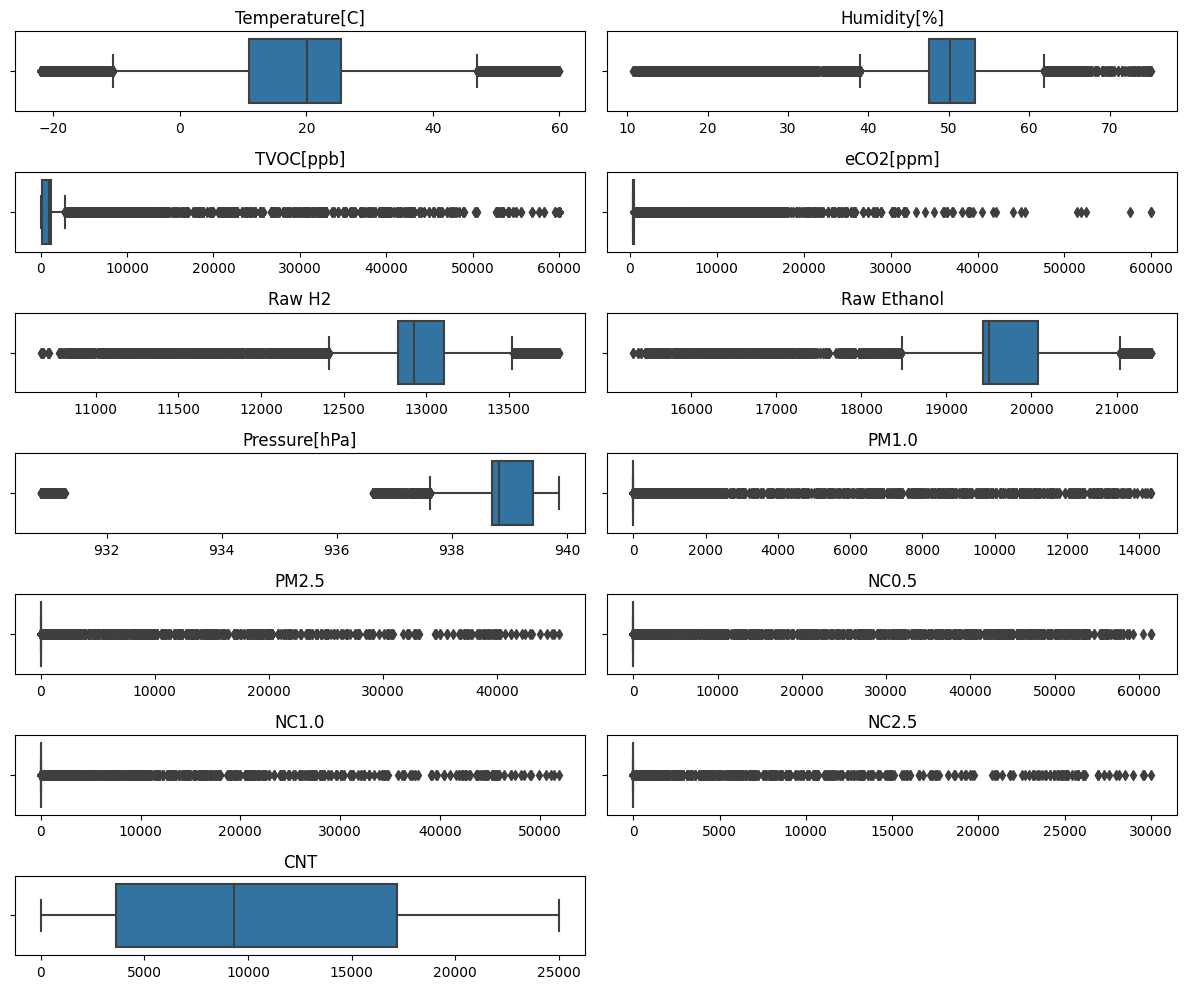

In [125]:
draw_boxplot(smoke_detector_data, columns_for_iqr)

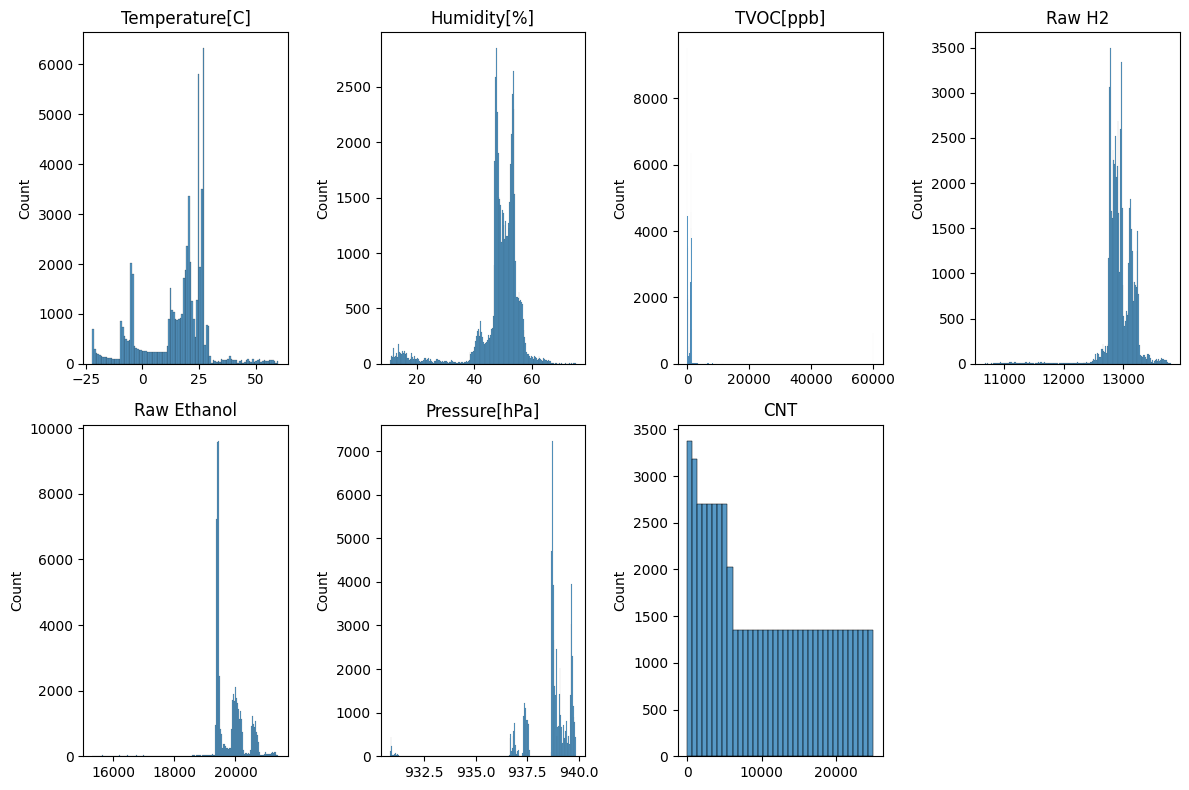

In [126]:
plt.figure(figsize=(12,8))

for index, column in enumerate(columns_for_visualization):
  plt.subplot(2, 4, index+1)
  sns.histplot(smoke_detector_data[column])
  plt.title(column)
  plt.xlabel('')

plt.tight_layout()
plt.show()

### Попытка подумать над данными или же как я удалял выбросы:

Обработка выбросов оказалась одним из ключевых моментов при анализе данного датасета. Графики типа "ящик с усами" (boxplot) продемонстрировали, что значительная часть данных на самом деле является выбросами, выходящими за границы "усов" диаграммы.

С одной стороны, наличие выбросов может негативно влиять на качество модели, поэтому их удаление является стандартной процедурой предобработки данных.

Однако, в нашем случае простое удаление выбросов чревато потерей важной информации, поскольку бóльшая часть наблюдений относится именно к этой категории.

In [ ]:
# print(f"Размерность до IQR - {smoke_detector_data.shape[0]}")

In [ ]:
# for column in columns_for_iqr:
#     Q1 = smoke_detector_data[column].quantile(0.25)
#     Q3 = smoke_detector_data[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     smoke_detector_data[column] = smoke_detector_data[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else smoke_detector_data[column].median())

In [ ]:
# draw_boxplot(smoke_detector_data, columns_for_iqr)

In [ ]:
# print(f"Размерность после IQR - {smoke_detector_data.shape[0]}")

---

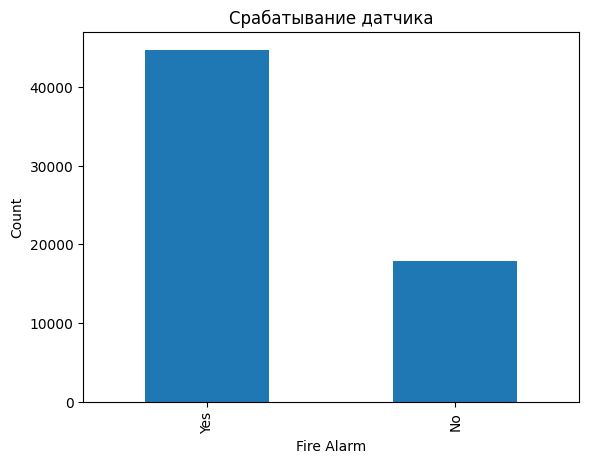

In [ ]:
smoke_detector_data['Fire Alarm'].value_counts().plot.bar()
plt.xlabel('Fire Alarm') ;
plt.ylabel('Count');
plt.title('Срабатывание датчика');

Далее я сравниваю распределние целевой функции в зависимости от температуры:

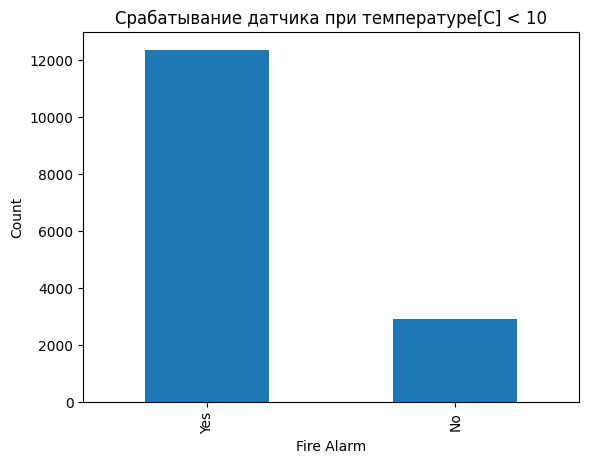

In [ ]:
temp_data_1 = smoke_detector_data[(smoke_detector_data['Temperature[C]'] < 10)]['Fire Alarm'].value_counts()
temp_data_1.plot.bar()
plt.xlabel('Fire Alarm') ;
plt.ylabel('Count');
plt.title('Срабатывание датчика при температуре[C] < 10');

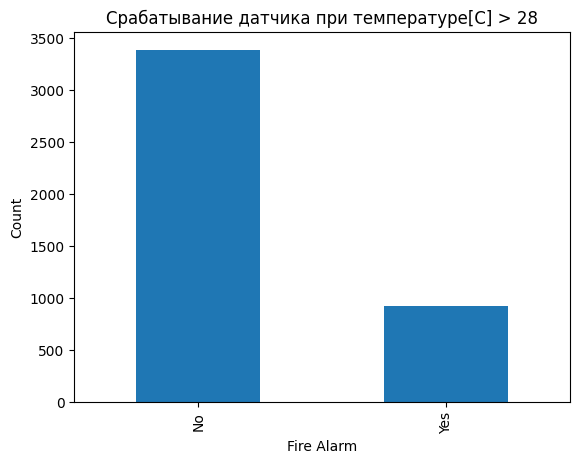

In [ ]:
temp_data_2 = smoke_detector_data[smoke_detector_data['Temperature[C]'] > 28]['Fire Alarm'].value_counts()
temp_data_2.plot.bar()
plt.xlabel('Fire Alarm') ;
plt.ylabel('Count');
plt.title('Срабатывание датчика при температуре[C] > 28');

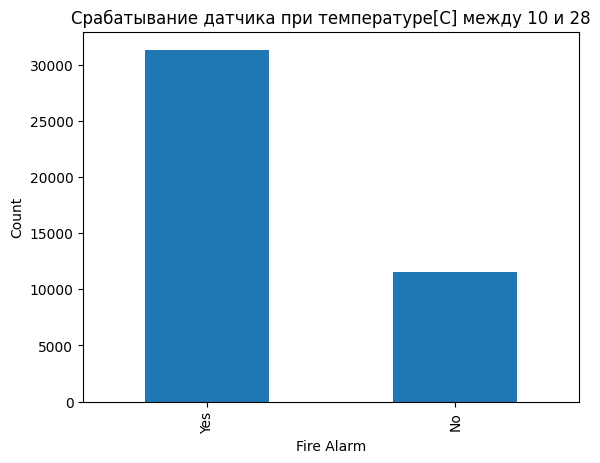

In [ ]:
temp_data_3 = smoke_detector_data[(smoke_detector_data['Temperature[C]'] > 10) & (smoke_detector_data['Temperature[C]'] < 28)]['Fire Alarm'].value_counts()
temp_data_3.plot.bar()
plt.xlabel('Fire Alarm') ;
plt.ylabel('Count');
plt.title('Срабатывание датчика при температуре[C] между 10 и 28');

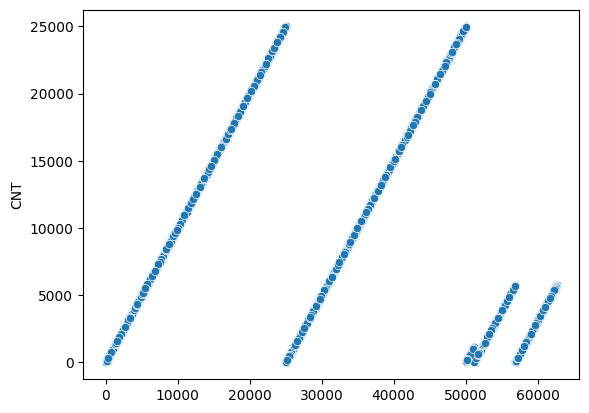

In [ ]:
sns.scatterplot(smoke_detector_data['CNT']); # что это.... что вообще это за колонка

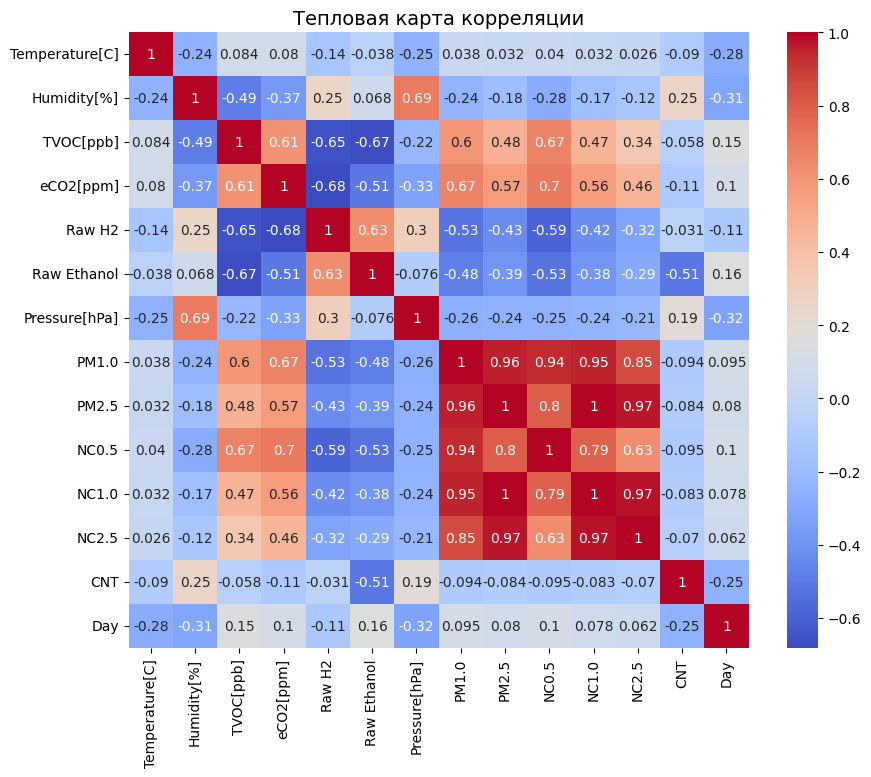

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(smoke_detector_data.corr(), annot=True, cmap='coolwarm');
plt.title("Тепловая карта корреляции", fontsize=14);

Есть мультиколлениарность между различными фичами. Давайте просто удалим их из нашего фрейма данных:

UPD: возможно именно эти колонки тянут на дно мои модели

In [27]:
smoke_detector_data.drop(['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT','Day'], axis=1, inplace=True)

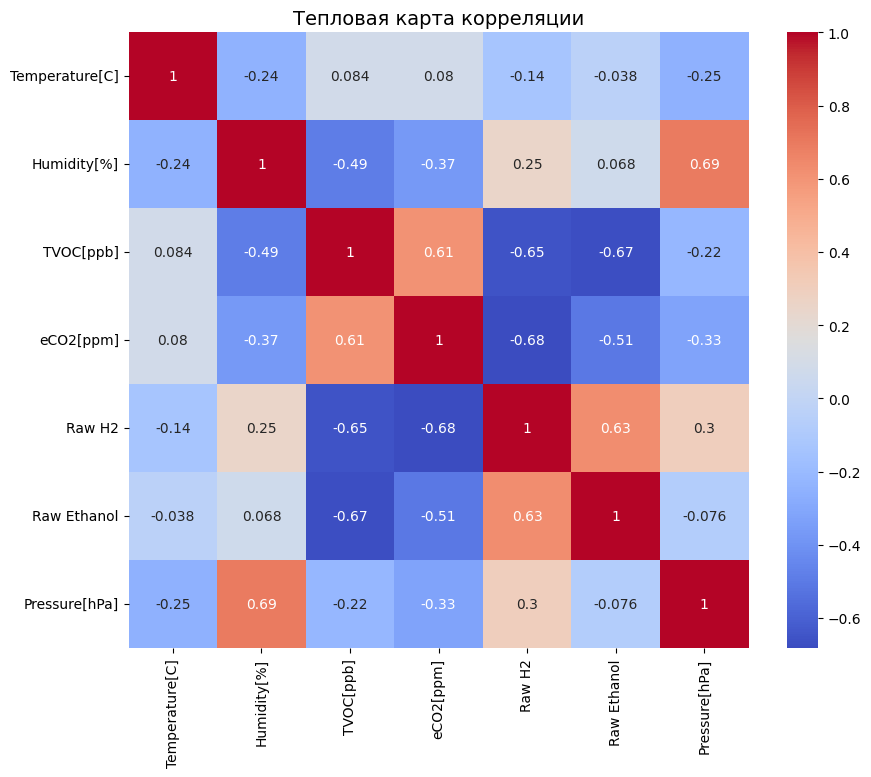

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(smoke_detector_data.corr(), annot=True, cmap='coolwarm');
plt.title("Тепловая карта корреляции", fontsize=14);

## Обработка пропущенных значений
Так как у нас внушительное количество данных (60000+ строк), то удалив 500-1000 строк, мы ничего не нарушим:

In [28]:
smoke_detector_data.isna().sum()

Temperature[C]    146
Humidity[%]       247
TVOC[ppb]         621
eCO2[ppm]         325
Raw H2            111
Raw Ethanol         0
Pressure[hPa]      27
Fire Alarm          0
dtype: int64

In [29]:
smoke_detector_data.dropna(inplace=True)

In [30]:
smoke_detector_data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
Fire Alarm        0
dtype: int64

In [31]:
smoke_detector_data.shape

(61161, 8)

In [32]:
# smoke_detector_data.to_csv('smoke_data_for_5_lab.csv', index=False) # для 5 лабы

## Разделение на выборки

Давайте отделим вектор ответов от основного фрейма данных:

In [33]:
X = smoke_detector_data.drop('Fire Alarm', axis=1)
y = smoke_detector_data['Fire Alarm'].map({"No": 0 , "Yes": 1})

Применим метод нормализации данных:

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y.to_numpy()

Следующим этапом я разделил данные на обучающий и тестовый наборы с заданным процентным соотношением для проведения обучения и последующей проверки производительности модели. Это делается для итоговой оценки модели на данных, которые она не видела:

In [39]:
size_data = smoke_detector_data.shape[0]
data_test_split = .9
train_data_X = X.iloc[:np.int_(size_data * data_test_split)]
train_data_y = y.iloc[:np.int_(size_data * data_test_split)]
test_data_X = X.iloc[np.int_(size_data * data_test_split):]
test_data_y = y.iloc[np.int_(size_data * data_test_split):]

Проверка размерности:

In [40]:
train_data_X.shape, train_data_y.shape

((55044, 7), (55044,))

In [41]:
train_data_y.value_counts()

Fire Alarm
1    39356
0    15688
Name: count, dtype: int64

In [42]:
test_data_X.shape, test_data_y.shape

((6117, 7), (6117,))

In [43]:
test_data_y.value_counts()

Fire Alarm
1    4325
0    1792
Name: count, dtype: int64

Разделение обучающей выборки на тренировочную и валидационную выборки:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size=.2, random_state=17)

Проверка размерности:

In [45]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [46]:
print('После применения метода кол-во меток со значением True: {}'.format(sum(y_train == 1)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(y_train == 0)))

После применения метода кол-во меток со значением True: 31423
После применения метода кол-во меток со значением False: 12612


In [47]:
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X_train, y_train.ravel())

In [48]:
print('После применения метода кол-во меток со значением True: {}'.format(sum(y_train_miss == 1)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(y_train_miss == 0)))

После применения метода кол-во меток со значением True: 12612
После применения метода кол-во меток со значением False: 12612


## Построение простейшей модели и оценка результата (with hyperparametrs)

### Напишем функцию, которая обучает модель:

In [49]:
def fit_and_evaluate_model(model,X_train, X_test, y_train, y_test, params=None):
    """Обучает модель с оптимизацией гиперпараметров и оценивает ее качество

    Аргументы:
    model - необученная модель машинного обучения
    X_train, y_train - данные для обучения
    X_test, y_test - данные для оценки
    params - словарь с параметрами для перебора (по умолчанию None)

    Возвращает:
    results - словарь с результатами, включая:
        - "best_model" - обученная модель с лучшими параметрами
        - "best_params" - лучшие параметры
        - "metrics" - словарь с метриками качества
        - "y_pred" - предсказания модели для X_test
    """

    best_params = None
    best_model = None
    results = {}

    if params is not None:
       optimizer = RandomizedSearchCV(model, params, cv=5, n_jobs=-1)
       optimizer.fit(X_train, y_train)
       best_model = optimizer.best_estimator_
       best_params = optimizer.best_params_
       y_pred = best_model.predict(X_test)

    else:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      best_model = model

    metrics = {
        "roc_auc": roc_auc_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "cohen_kappa": cohen_kappa_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
    }

    results['best_model'] = best_model
    results['best_params'] = best_params
    results['metrics'] = metrics
    results['y_pred'] = y_pred

    return results

### Random Forest Classifier

В процессе построения модели для решения данной задачи, я попробовал использовать ансамбль случайных деревьев решений (RandomForestClassifier). К сожалению, несмотря на мои попытки бороться с переобучением при помощи регуляризации и подбора оптимальных гиперпараметров, модель демонстрировала сильный перефит на тестовых данных.

Чтобы исключить влияние переобучения и улучшить качество финального решения, я принял решение отказаться от использования данного метода и закомментировал соответствующий код:

In [ ]:
#model = RandomForestClassifier(random_state=17)

# params = {'max_depth': [5, 10 ,15, 20],
#           'n_estimators': [300, 400, 500],
#           'min_samples_split': [2, 3, 5]
#          }

#results =  fit_and_evaluate_model(model, X_train, X_test, y_train, y_test)
#pprint(results)

### LogisticRegression

In [ ]:
lg_with_hiperparams = LogisticRegression(random_state=17)

params_grid = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "max_iter": [500, 800, 100],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

results_lr = fit_and_evaluate_model(lg_with_hiperparams, X_train_miss, X_test, y_train_miss, y_test)
pprint(results_lr)

{'best_model': LogisticRegression(random_state=17),
 'best_params': None,
 'metrics': {'accuracy': 0.9042601507857208,
             'cohen_kappa': 0.7436063588439661,
             'f1': 0.9365671641791046,
             'recall': 0.9881889763779528,
             'roc_auc': 0.8408249507089126},
 'y_pred': array([0, 1, 0, ..., 1, 1, 1])}


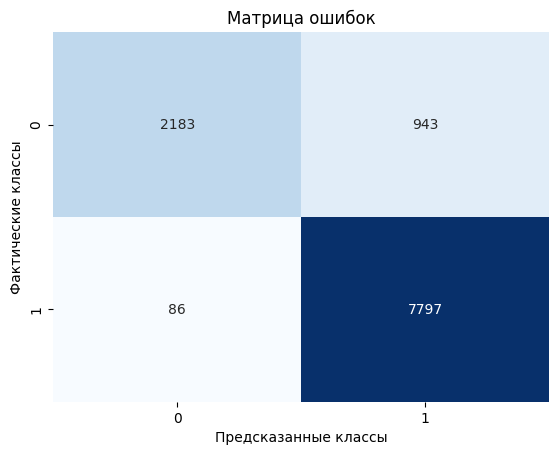

In [ ]:
output_of_the_results_matrix(y_test, results_lr['y_pred'])

In [ ]:
results_lr_with_params = fit_and_evaluate_model(lg_with_hiperparams, X_train_miss, X_test, y_train_miss, y_test, params_grid)

In [ ]:
results_lr_with_params['best_params']

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 800, 'C': 0.01}

In [ ]:
results_lr_with_params['metrics']

{'roc_auc': 0.8085707433342757,
 'accuracy': 0.8848215096739032,
 'recall': 0.9885160137807835,
 'cohen_kappa': 0.6873060252484589,
 'f1': 0.9243527025414627}

### KNN - sklearn

In [ ]:
error_rate = []
accuracy_scores = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_miss, y_train_miss)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    accuracy_scores.append(accuracy_score(y_pred, y_test))
    print(f"Iteration {i} completed")

Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed
Iteration 6 completed
Iteration 7 completed
Iteration 8 completed
Iteration 9 completed
Iteration 10 completed
Iteration 11 completed
Iteration 12 completed
Iteration 13 completed
Iteration 14 completed
Iteration 15 completed
Iteration 16 completed
Iteration 17 completed
Iteration 18 completed
Iteration 19 completed
Iteration 20 completed
Iteration 21 completed
Iteration 22 completed
Iteration 23 completed
Iteration 24 completed
Iteration 25 completed
Iteration 26 completed
Iteration 27 completed
Iteration 28 completed
Iteration 29 completed
Iteration 30 completed
Iteration 31 completed
Iteration 32 completed
Iteration 33 completed
Iteration 34 completed
Iteration 35 completed
Iteration 36 completed
Iteration 37 completed
Iteration 38 completed
Iteration 39 completed
Iteration 40 completed


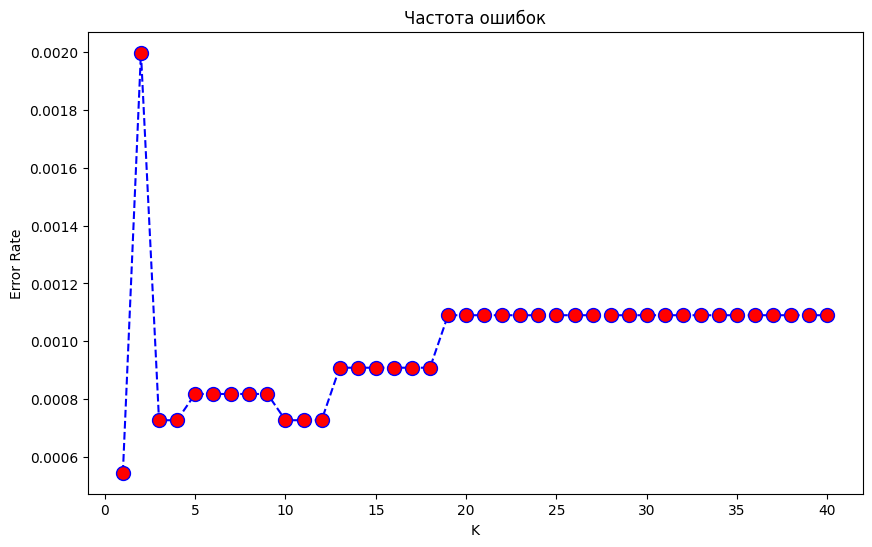

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),
         error_rate,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10);
plt.title('Частота ошибок');
plt.xlabel('K');
plt.ylabel('Error Rate');

In [ ]:
print(f"Best k = {error_rate.index(np.min(error_rate))+1}, error = {np.min(error_rate)}")

Best k = 1, error = 0.0005450086293032973


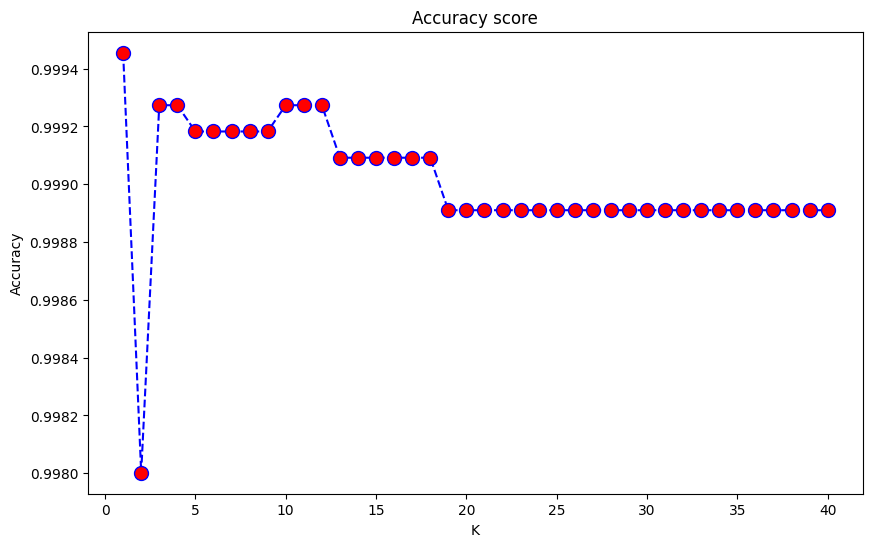

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),
         accuracy_scores,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10);
plt.title('Accuracy score');
plt.xlabel('K');
plt.ylabel('Accuracy');

In [ ]:
print(f"Best accuracy = {np.max(accuracy_scores)}")

Best accuracy = 0.9994549913706967


Итоговая модель KNN будет иметь k = 1 с результатом accuracy = 0.9997

### KNN - моя реализация

In [51]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Рассчитать расстояния между x и всеми примерами в обучающем наборе
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]

        # Получить индексы K ближайших примеров
        k_neighbors_indices = np.argsort(distances)[:self.k]

        # Получить метки K ближайших примеров
        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

        # Найти наиболее часто встречающуюся метку
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


In [60]:
knn = KNN(k=3)
knn.fit(X_train_miss.values, y_train_miss)

In [61]:
predict_value = knn.predict(X_test.values)

In [62]:
predict_value

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [65]:
print("roc_auc", roc_auc_score(y_test, predict_value))
print("accuracy", accuracy_score(y_test, predict_value))

roc_auc 0.9991341865562317
accuracy 0.9991824870560451


### Наивные методы Байеса

In [63]:
gaussian_nb = GaussianNB()
result_g_nb = fit_and_evaluate_model(gaussian_nb, X_train_miss, X_test, y_train_miss, y_test)

In [ ]:
result_g_nb

{'best_model': GaussianNB(),
 'best_params': None,
 'metrics': {'roc_auc': 0.6177747794053613,
  'accuracy': 0.774548097011536,
  'recall': 0.9805911455029811,
  'cohen_kappa': 0.2981753607016556,
  'f1': 0.861665366179913},
 'y_pred': array([1, 1, 1, ..., 1, 1, 1])}

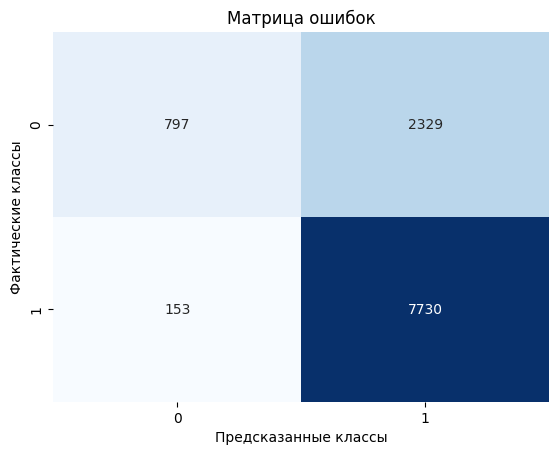

In [ ]:
output_of_the_results_matrix(y_test, result_g_nb['y_pred'])

### SVC

In [ ]:
# svm_classifier = SVC()
# result_svc = fit_and_evaluate_model(svm_classifier, X_train, X_test, y_train, y_test)
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly']}

In [ ]:
svm_classifier_linear = SVC(kernel='linear').fit(X_train_miss, y_train_miss)
svm_classifier_rbf = SVC(kernel='rbf').fit(X_train_miss, y_train_miss)
svm_classifier_poly = SVC(kernel='poly').fit(X_train_miss, y_train_miss)

Функция для выбора ядра:

In [ ]:
def svm_select_kernel(kernel, X_train, y_train):
    model = SVC(kernel=kernel).fit(X_train, y_train)

#### Ядро: linear

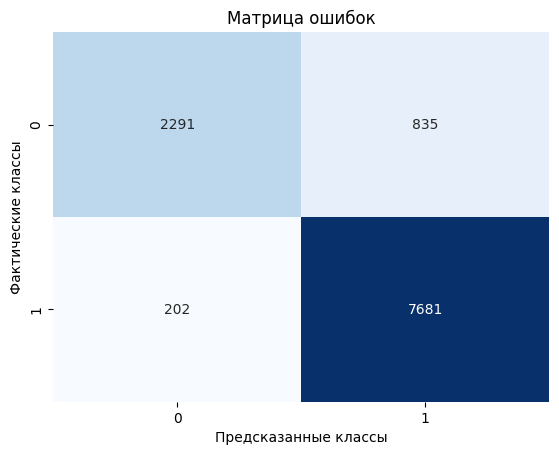

In [ ]:
output_of_the_results_matrix(y_test, svm_classifier_linear.predict(X_test))

#### Ядро: rbf

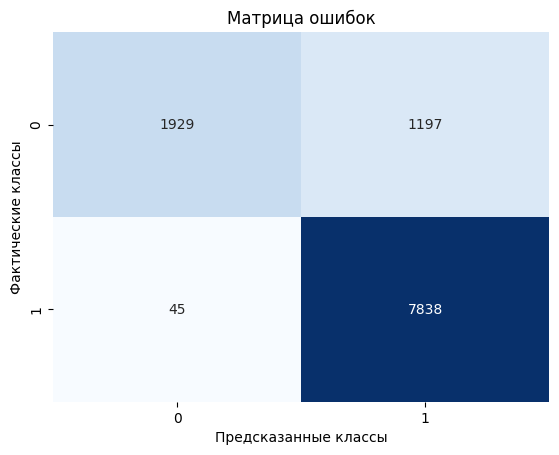

In [ ]:
output_of_the_results_matrix(y_test, svm_classifier_rbf.predict(X_test))

#### Ядро: poly

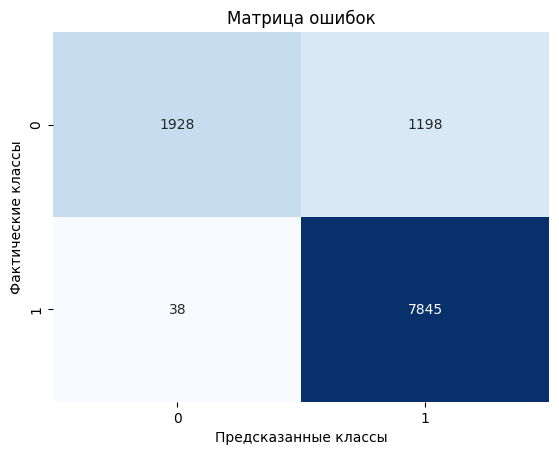

In [ ]:
output_of_the_results_matrix(y_test, svm_classifier_poly.predict(X_test))

In [ ]:
#result_svc_with_hp = fit_and_evaluate_model(svm_classifier, X_train, X_test, y_train, y_test, param_grid_svm)  4 часа и безуспешно

In [ ]:
#result_svc_with_hp['best_params'] # каждое ядро по отдельности сделать

## Финальная часть

In [ ]:
classifiers = {
    'SVC': SVC(),
    'KNN classifier': KNeighborsClassifier(1),
    'LogisticRegression': LogisticRegression(solver='saga', penalty='l2', max_iter=800, C=0.01),
    'GaussianNB': GaussianNB()
}

In [ ]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train_miss, np.ravel(y_train_miss))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))
    print()

Accuracy (train) for SVC: 88.7% 
              precision    recall  f1-score   support

           0       0.98      0.62      0.76      3126
           1       0.87      0.99      0.93      7883

    accuracy                           0.89     11009
   macro avg       0.92      0.81      0.84     11009
weighted avg       0.90      0.89      0.88     11009


Accuracy (train) for KNN classifier: 99.9% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3126
           1       1.00      1.00      1.00      7883

    accuracy                           1.00     11009
   macro avg       1.00      1.00      1.00     11009
weighted avg       1.00      1.00      1.00     11009


Accuracy (train) for LogisticRegression: 90.3% 
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      3126
           1       0.89      0.99      0.94      7883

    accuracy                           0.90     11009
 

## Финальная оценка

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_miss, y_train_miss)
y_pred = knn.predict(test_data_X)

In [ ]:
accuracy_score(test_data_y, knn.predict(test_data_X)) # Финальная оценка

0.9967304234101684